In [ ]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sales.zip to Sales.zip


In [ ]:
!unzip Sales.zip

Archive:  Sales.zip
  inflating: archive_2/01- Sales_January_2019.csv  
  inflating: archive_2/02- Sales_February_2019.csv  
  inflating: archive_2/03- Sales_March_2019.csv  
  inflating: archive_2/04- Sales_April_2019.csv  
  inflating: archive_2/05- Sales_May_2019.csv  
  inflating: archive_2/06- Sales_June_2019.csv  
  inflating: archive_2/07- Sales_July_2019.csv  
  inflating: archive_2/08- Sales_August_2019.csv  
  inflating: archive_2/09- Sales_September_2019.csv  
  inflating: archive_2/10- Sales_October_2019.csv  
  inflating: archive_2/11- Sales_November_2019.csv  
  inflating: archive_2/12- Sales_December_2019.csv  


In [ ]:
# Get a list of all the CSV files in the directory
csv_files = glob.glob('archive_2/*.csv')

# Create an empty list to store dataframes
df_list = []

# Loop through the CSV files, read them into a dataframe, and add a new column based on the filename
for filename in csv_files:
    df = pd.read_csv(filename)
    # Get the base filename without extension
    basename = os.path.splitext(os.path.basename(filename))[0]
    # Add a new column with the base filename
    df['month'] = basename
    df_list.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(df_list, ignore_index=True)

In [ ]:
combined_df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
20456,289050,AA Batteries (4-pack),2,3.84,11/21/19 07:42,"411 Washington St, New York City, NY 10001",11- Sales_November_2019
80810,183422,Google Phone,1,600,04/26/19 06:16,"60 Lake St, Atlanta, GA 30301",04- Sales_April_2019
3987,145016,iPhone,1,700,01/03/19 16:10,"789 Lincoln St, Los Angeles, CA 90001",01- Sales_January_2019
171779,158759,AAA Batteries (4-pack),2,2.99,02/10/19 09:39,"915 Ridge St, Portland, OR 97035",02- Sales_February_2019
44692,162645,iPhone,1,700,03/25/19 21:26,"362 Park St, San Francisco, CA 94016",03- Sales_March_2019
66850,230180,Apple Airpods Headphones,1,150,07/12/19 14:05,"146 5th St, Seattle, WA 98101",07- Sales_July_2019
56270,173704,34in Ultrawide Monitor,1,379.99,03/25/19 22:00,"4 South St, Boston, MA 02215",03- Sales_March_2019
154850,240256,Lightning Charging Cable,1,14.95,08/24/19 07:22,"203 Church St, Seattle, WA 98101",08- Sales_August_2019
73467,236531,AAA Batteries (4-pack),1,2.99,07/13/19 18:22,"475 Dogwood St, San Francisco, CA 94016",07- Sales_July_2019
6904,147801,20in Monitor,1,109.99,01/24/19 17:05,"572 Jefferson St, Boston, MA 02215",01- Sales_January_2019


In [ ]:
combined_df.shape

(186850, 7)

In [ ]:
print(combined_df.isnull().sum())

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
month                 0
dtype: int64


In [ ]:
df = combined_df.dropna()

In [ ]:
df.shape

(186305, 7)

In [ ]:
print(df['Price Each'].dtype)

object


In [ ]:
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast="float")

In [ ]:
print(df['Price Each'].dtype)

float32


In [ ]:
df['margin'] = df['Price Each'] * 0.25
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,margin
96561,300002,AAA Batteries (4-pack),1,2.990000,12/31/19 12:32,"596 South St, Atlanta, GA 30301",12- Sales_December_2019,0.747500
25288,293672,Lightning Charging Cable,1,14.950000,11/17/19 23:44,"9 Ridge St, Los Angeles, CA 90001",11- Sales_November_2019,3.737500
176709,249632,Flatscreen TV,1,300.000000,09/03/19 19:29,"632 Wilson St, San Francisco, CA 94016",09- Sales_September_2019,75.000000
176255,249200,Lightning Charging Cable,1,14.950000,09/26/19 10:52,"814 Johnson St, Seattle, WA 98101",09- Sales_September_2019,3.737500
421,141645,Lightning Charging Cable,1,14.950000,01/30/19 15:30,"98 Forest St, New York City, NY 10001",01- Sales_January_2019,3.737500
45693,163600,Bose SoundSport Headphones,1,99.989998,03/07/19 17:27,"199 West St, Los Angeles, CA 90001",03- Sales_March_2019,24.997499
68018,231290,USB-C Charging Cable,1,11.950000,07/28/19 09:03,"773 9th St, Austin, TX 73301",07- Sales_July_2019,2.987500
23666,292120,27in 4K Gaming Monitor,1,389.989990,11/26/19 20:35,"138 Forest St, San Francisco, CA 94016",11- Sales_November_2019,97.497498
35508,201810,Wired Headphones,1,11.990000,05/09/19 17:33,"273 Lake St, San Francisco, CA 94016",05- Sales_May_2019,2.997500
111635,314428,AA Batteries (4-pack),1,3.840000,12/10/19 12:53,"443 13th St, Portland, OR 97035",12- Sales_December_2019,0.960000


In [ ]:
df['margin'] = df['margin'].round(2)

In [ ]:
df['Price Each'] = df['Price Each'].round(2)

In [ ]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,margin
95064,298593,34in Ultrawide Monitor,1,379.989990,12/31/19 10:16,"515 Adams St, Los Angeles, CA 90001",12- Sales_December_2019,95.00
154005,239436,Wired Headphones,1,11.990000,08/10/19 15:41,"698 Lincoln St, Boston, MA 02215",08- Sales_August_2019,3.00
80980,183580,AA Batteries (4-pack),1,3.840000,04/27/19 20:40,"332 Washington St, Atlanta, GA 30301",04- Sales_April_2019,0.96
22320,290830,Wired Headphones,1,11.990000,11/22/19 20:44,"574 Washington St, San Francisco, CA 94016",11- Sales_November_2019,3.00
89620,191825,Wired Headphones,2,11.990000,04/10/19 15:02,"417 Cherry St, New York City, NY 10001",04- Sales_April_2019,3.00
139879,212187,Lightning Charging Cable,1,14.950000,06/06/19 14:35,"86 Cedar St, Dallas, TX 75001",06- Sales_June_2019,3.74
149244,221130,20in Monitor,1,109.989998,06/27/19 12:52,"434 Pine St, Portland, ME 04101",06- Sales_June_2019,27.50
123752,265692,Lightning Charging Cable,1,14.950000,10/04/19 18:35,"829 Chestnut St, Atlanta, GA 30301",10- Sales_October_2019,3.74
70213,233402,Flatscreen TV,1,300.000000,07/27/19 14:40,"889 7th St, San Francisco, CA 94016",07- Sales_July_2019,75.00
126735,268533,Bose SoundSport Headphones,1,99.989998,10/26/19 21:51,"834 North St, Atlanta, GA 30301",10- Sales_October_2019,25.00


In [ ]:
# separate the 'Order Date' column into 'Date' and 'Time' columns
df[['Date', 'Time']] = df['Order Date'].str.split(' ', expand=True)

In [ ]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,margin,Date,Time
107867,310827,AA Batteries (4-pack),1,3.84000,12/20/19 13:11,"94 Madison St, Dallas, TX 75001",12- Sales_December_2019,0.96,12/20/19,13:11
150030,221881,USB-C Charging Cable,1,11.95000,06/11/19 12:13,"867 12th St, San Francisco, CA 94016",06- Sales_June_2019,2.99,06/11/19,12:13
151576,237115,Apple Airpods Headphones,1,150.00000,08/27/19 11:58,"431 Cedar St, New York City, NY 10001",08- Sales_August_2019,37.50,08/27/19,11:58
111293,314099,AAA Batteries (4-pack),2,2.99000,12/14/19 22:31,"19 Adams St, Seattle, WA 98101",12- Sales_December_2019,0.75,12/14/19,22:31
15114,283950,Flatscreen TV,1,300.00000,11/11/19 15:48,"613 Highland St, New York City, NY 10001",11- Sales_November_2019,75.00,11/11/19,15:48
126138,267969,Wired Headphones,1,11.99000,10/30/19 16:50,"760 Adams St, New York City, NY 10001",10- Sales_October_2019,3.00,10/30/19,16:50
128370,270100,Macbook Pro Laptop,1,1700.00000,10/15/19 21:27,"61 Wilson St, Los Angeles, CA 90001",10- Sales_October_2019,425.00,10/15/19,21:27
122411,264406,ThinkPad Laptop,1,999.98999,10/15/19 12:52,"66 12th St, Los Angeles, CA 90001",10- Sales_October_2019,250.00,10/15/19,12:52
124295,266213,Lightning Charging Cable,1,14.95000,10/28/19 22:02,"176 Pine St, Dallas, TX 75001",10- Sales_October_2019,3.74,10/28/19,22:02
141443,213672,AAA Batteries (4-pack),3,2.99000,06/13/19 16:48,"7 8th St, Los Angeles, CA 90001",06- Sales_June_2019,0.75,06/13/19,16:48


In [ ]:
print(df['Date'].dtype)

object


In [ ]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
df['Weekday'] = df['Date'].dt.day_name()

In [ ]:
df = df.drop('Order Date', axis=1)

In [ ]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month,margin,Date,Time,Weekday
163820,151164,34in Ultrawide Monitor,1,379.989990,"310 Cedar St, Boston, MA 02215",02- Sales_February_2019,95.00,2019-02-21,12:14,Thursday
51236,168900,Lightning Charging Cable,1,14.950000,"623 West St, Los Angeles, CA 90001",03- Sales_March_2019,3.74,2019-03-25,15:55,Monday
110143,312997,27in 4K Gaming Monitor,1,389.989990,"972 Jackson St, Boston, MA 02215",12- Sales_December_2019,97.50,2019-12-28,13:42,Saturday
105019,308091,27in FHD Monitor,1,149.990005,"717 Cherry St, Boston, MA 02215",12- Sales_December_2019,37.50,2019-12-19,10:25,Thursday
2722,143814,Apple Airpods Headphones,1,150.000000,"785 8th St, Portland, OR 97035",01- Sales_January_2019,37.50,2019-01-08,15:53,Tuesday
45642,163552,Lightning Charging Cable,1,14.950000,"365 Elm St, Dallas, TX 75001",03- Sales_March_2019,3.74,2019-03-20,05:19,Wednesday
166788,153994,Lightning Charging Cable,1,14.950000,"536 Meadow St, New York City, NY 10001",02- Sales_February_2019,3.74,2019-02-03,16:12,Sunday
46486,164358,Lightning Charging Cable,1,14.950000,"379 Madison St, Boston, MA 02215",03- Sales_March_2019,3.74,2019-03-25,13:34,Monday
147961,219901,Apple Airpods Headphones,1,150.000000,"899 West St, Los Angeles, CA 90001",06- Sales_June_2019,37.50,2019-06-08,20:13,Saturday
112559,315310,AAA Batteries (4-pack),2,2.990000,"993 11th St, Portland, ME 04101",12- Sales_December_2019,0.75,2019-12-17,21:59,Tuesday


In [ ]:
df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(', ', expand=True)

In [ ]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,month,margin,Date,Time,Weekday,Street,City,State
65632,229018,Apple Airpods Headphones,1,150.000000,"481 Walnut St, Seattle, WA 98101",07- Sales_July_2019,37.50,2019-07-12,20:55,Friday,481 Walnut St,Seattle,WA 98101
153113,238587,Lightning Charging Cable,1,14.950000,"360 Cedar St, New York City, NY 10001",08- Sales_August_2019,3.74,2019-08-23,18:28,Friday,360 Cedar St,New York City,NY 10001
113012,315743,Bose SoundSport Headphones,1,99.989998,"577 Sunset St, Boston, MA 02215",12- Sales_December_2019,25.00,2019-12-16,02:35,Monday,577 Sunset St,Boston,MA 02215
53833,171385,34in Ultrawide Monitor,1,379.989990,"653 6th St, Seattle, WA 98101",03- Sales_March_2019,95.00,2019-03-24,23:41,Sunday,653 6th St,Seattle,WA 98101
68067,231338,ThinkPad Laptop,1,999.989990,"561 4th St, San Francisco, CA 94016",07- Sales_July_2019,250.00,2019-07-09,18:21,Tuesday,561 4th St,San Francisco,CA 94016
44960,162899,34in Ultrawide Monitor,1,379.989990,"577 Lincoln St, Dallas, TX 75001",03- Sales_March_2019,95.00,2019-03-17,19:42,Sunday,577 Lincoln St,Dallas,TX 75001
124995,266888,Bose SoundSport Headphones,1,99.989998,"669 Highland St, Boston, MA 02215",10- Sales_October_2019,25.00,2019-10-19,20:20,Saturday,669 Highland St,Boston,MA 02215
125367,267242,USB-C Charging Cable,1,11.950000,"940 Jackson St, Los Angeles, CA 90001",10- Sales_October_2019,2.99,2019-10-22,07:42,Tuesday,940 Jackson St,Los Angeles,CA 90001
58449,175794,Google Phone,1,600.000000,"534 Highland St, Seattle, WA 98101",03- Sales_March_2019,150.00,2019-03-01,20:28,Friday,534 Highland St,Seattle,WA 98101
115559,318175,AA Batteries (4-pack),2,3.840000,"960 Maple St, San Francisco, CA 94016",12- Sales_December_2019,0.96,2019-12-14,18:19,Saturday,960 Maple St,San Francisco,CA 94016


In [ ]:
df[['State', 'Post Code']] = df['State'].str.split(' ', n=1, expand=True)

In [ ]:
df = df.drop('Street', axis=1)

In [ ]:
df = df.drop('Purchase Address', axis=1)

In [ ]:
df['Hours'] = df['Time'].str.split(':', expand=True)[0]

In [ ]:
df = df.drop('Time', axis=1)

In [ ]:
df = df.rename(columns={'Hours': 'Purchase Time'})

In [ ]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,month,margin,Date,Weekday,City,State,Post Code,Purchase Time
10641,279676,AAA Batteries (4-pack),1,2.990000,11- Sales_November_2019,0.75,2019-11-14,Thursday,New York City,NY,10001,15
58036,175396,Apple Airpods Headphones,1,150.000000,03- Sales_March_2019,37.50,2019-03-18,Monday,New York City,NY,10001,10
114343,317007,27in FHD Monitor,1,149.990005,12- Sales_December_2019,37.50,2019-12-01,Sunday,San Francisco,CA,94016,23
69350,232577,AAA Batteries (4-pack),3,2.990000,07- Sales_July_2019,0.75,2019-07-23,Tuesday,New York City,NY,10001,20
50821,168505,AA Batteries (4-pack),1,3.840000,03- Sales_March_2019,0.96,2019-03-11,Monday,Boston,MA,02215,14
80975,183575,Lightning Charging Cable,1,14.950000,04- Sales_April_2019,3.74,2019-04-16,Tuesday,Austin,TX,73301,00
150697,222512,27in FHD Monitor,1,149.990005,06- Sales_June_2019,37.50,2019-06-18,Tuesday,Seattle,WA,98101,09
2009,143139,AAA Batteries (4-pack),1,2.990000,01- Sales_January_2019,0.75,2019-01-05,Saturday,San Francisco,CA,94016,23
121762,263785,AAA Batteries (4-pack),4,2.990000,10- Sales_October_2019,0.75,2019-10-24,Thursday,New York City,NY,10001,14
162207,247280,USB-C Charging Cable,1,11.950000,08- Sales_August_2019,2.99,2019-08-02,Friday,Seattle,WA,98101,21


In [ ]:
print('Total unique products =', len(df.Product.value_counts()))

print('List of Unique Products = \n', df.Product.value_counts())

Total unique products = 20
List of Unique Products = 
 USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Product                         355
Name: Product, dtype: int64


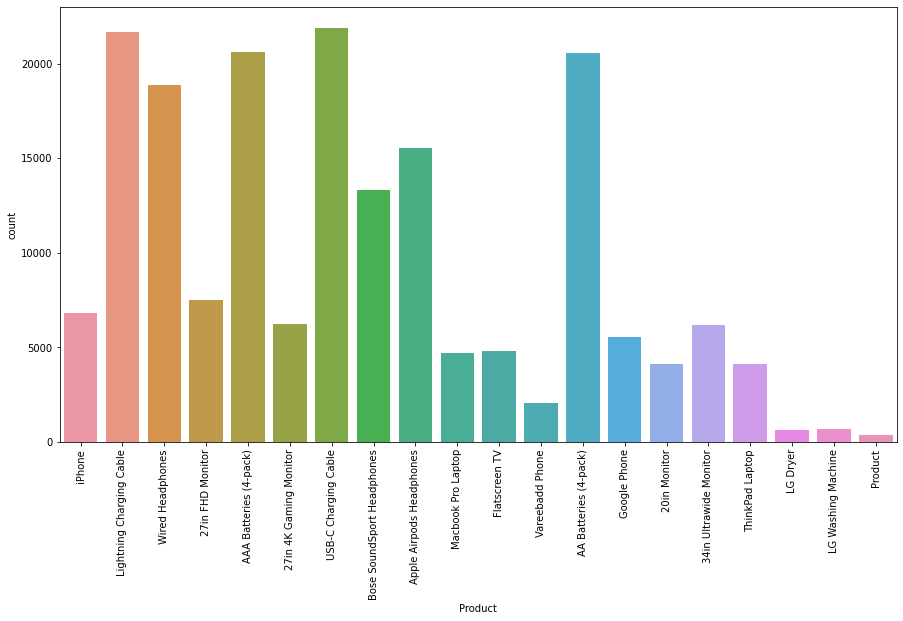

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'Product',data = df)
plt.xticks(rotation=90)
plt.show()

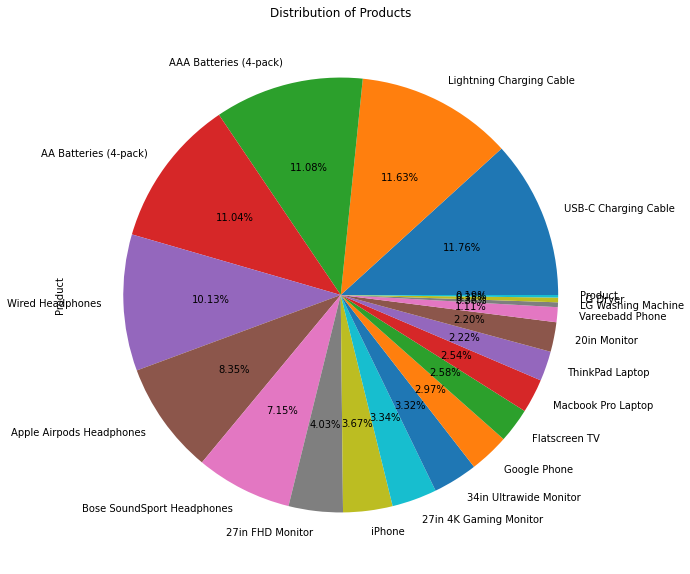

In [ ]:
plt.figure(figsize = (10,10))
df['Product'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Distribution of Products")
plt.show()

In [ ]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,month,margin,Date,Weekday,City,State,Post Code,Purchase Time
0,141234,iPhone,1,700.00,01- Sales_January_2019,175.00,2019-01-22,Tuesday,Boston,MA,02215,21
1,141235,Lightning Charging Cable,1,14.95,01- Sales_January_2019,3.74,2019-01-28,Monday,Portland,OR,97035,14


In [ ]:
filter = df['Quantity Ordered'] != 'Quantity Ordered'
#Removing Text from Quantity Ordered column
df = df[filter]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  object        
 3   Price Each        185950 non-null  float32       
 4   month             185950 non-null  object        
 5   margin            185950 non-null  float32       
 6   Date              185950 non-null  datetime64[ns]
 7   Weekday           185950 non-null  object        
 8   City              185950 non-null  object        
 9   State             185950 non-null  object        
 10  Post Code         185950 non-null  object        
 11  Purchase Time     185950 non-null  object        
dtypes: datetime64[ns](1), float32(2), object(9)
memory usage: 17.0+ MB


In [ ]:
#Changing "Quantity Ordered", "Price Each" data type
df['Quantity Ordered'], df['Price Each'] = df['Quantity Ordered'].astype("int64"), df['Price Each'].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   month             185950 non-null  object        
 5   margin            185950 non-null  float32       
 6   Date              185950 non-null  datetime64[ns]
 7   Weekday           185950 non-null  object        
 8   City              185950 non-null  object        
 9   State             185950 non-null  object        
 10  Post Code         185950 non-null  object        
 11  Purchase Time     185950 non-null  object        
dtypes: datetime64[ns](1), float32(1), float64(1), int64(1), object(8)
memory usage: 17.7+ MB


In [ ]:
df['Revenue'] = df['Quantity Ordered'] * df['Price Each']

In [ ]:
df['Revenue'] = df['Revenue'].astype("int64")

In [ ]:
df['Month'] = df['month'].str.split("_", expand = True)[1]
df = df.drop('month', axis=1)
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,margin,Date,Weekday,City,State,Post Code,Purchase Time,Revenue,Month
30613,197157,27in FHD Monitor,1,149.990005,37.50,2019-05-15,Wednesday,San Francisco,CA,94016,21,149,May
18255,286953,USB-C Charging Cable,1,11.950000,2.99,2019-11-02,Saturday,Portland,OR,97035,13,11,November
21087,289650,Flatscreen TV,1,300.000000,75.00,2019-11-14,Thursday,Portland,ME,04101,14,300,November
152597,238093,Lightning Charging Cable,1,14.950000,3.74,2019-08-15,Thursday,San Francisco,CA,94016,12,14,August
95572,299068,Wired Headphones,1,11.990000,3.00,2019-12-09,Monday,New York City,NY,10001,12,11,December
131055,272657,Lightning Charging Cable,1,14.950000,3.74,2019-10-19,Saturday,New York City,NY,10001,12,14,October
96173,299632,iPhone,1,700.000000,175.00,2019-12-18,Wednesday,Los Angeles,CA,90001,09,700,December
65275,228679,27in FHD Monitor,1,149.990005,37.50,2019-07-23,Tuesday,San Francisco,CA,94016,21,149,July
99752,303057,Wired Headphones,1,11.990000,3.00,2019-12-18,Wednesday,Austin,TX,73301,17,11,December
165057,152341,Bose SoundSport Headphones,1,99.989998,25.00,2019-02-20,Wednesday,Portland,ME,04101,06,99,February


Try plotting:

how many sales happened in each month

how many sales happened each day of the week

how many sales happened in each category for each and every month

how many sales happened in each category for each and every month

This is a time-series project so you have to predict the future sales

## **Total sales in each month**

Text(0.5, 1.0, 'Total Sales for each month')

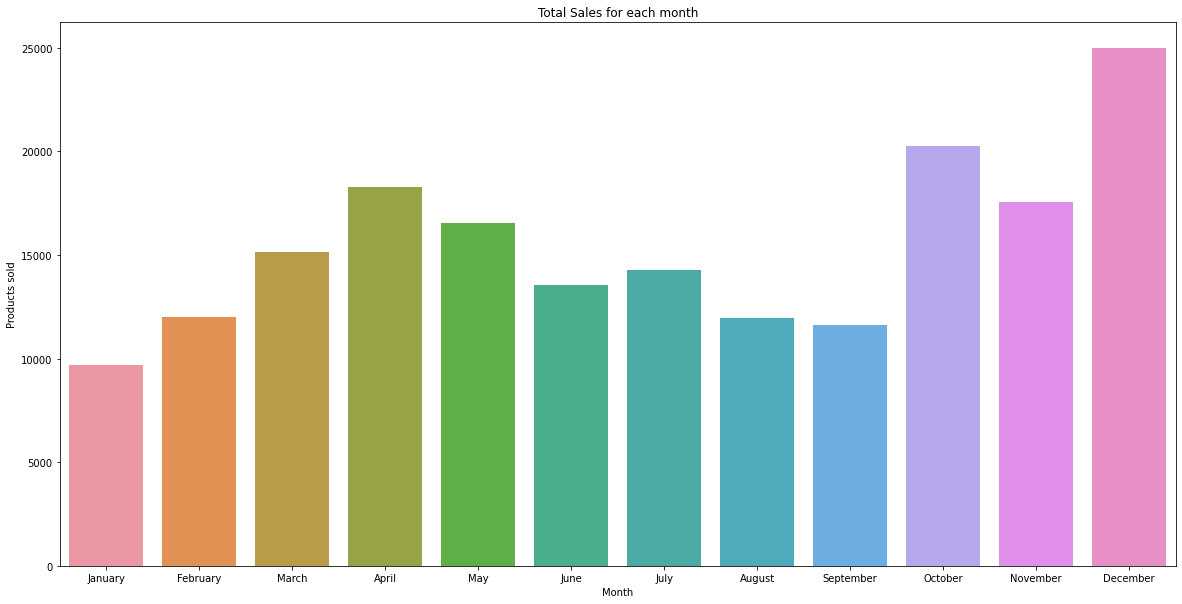

In [ ]:
plt.figure(figsize = (20,10))
sns.countplot(x='Month', data=df, order=['January','February','March','April','May','June','July','August','September','October','November','December'])
plt.xlabel('Month')
plt.ylabel('Products sold')
plt.title('Total Sales for each month')

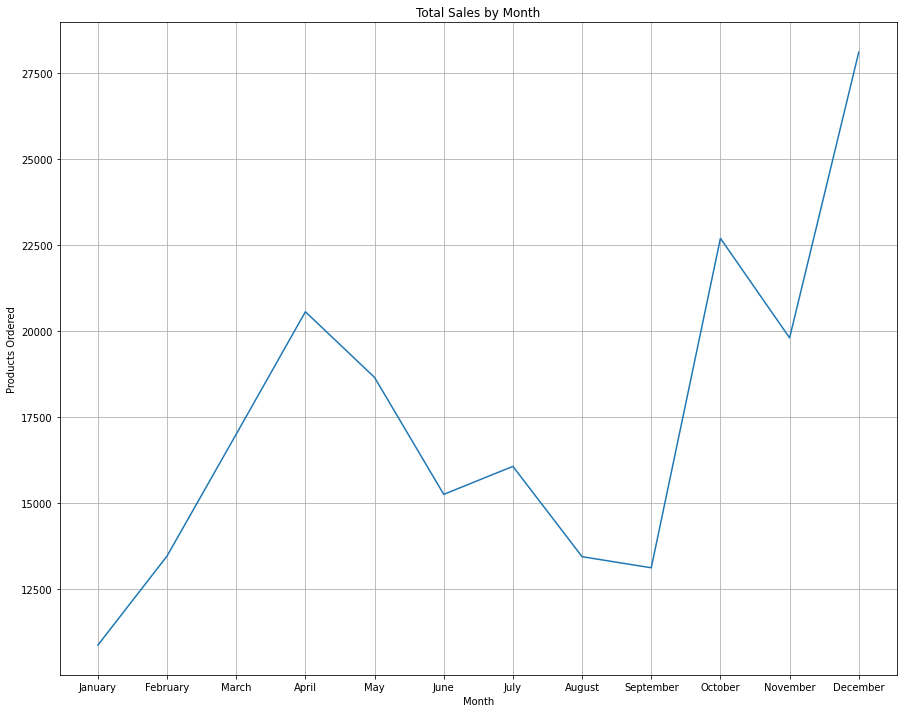

In [ ]:
plt.figure(figsize=(15, 12))
sales_month = df.groupby('Month').agg({"Quantity Ordered":"sum"}).reset_index()
sales_month = sales_month.sort_values('Month')
sales_month['Month_names'] = pd.Categorical(sales_month['Month'], categories=['January','February','March','April','May','June','July','August','September','October','November','December'], ordered=True)
sns.lineplot(x='Month_names', y='Quantity Ordered', data=sales_month)
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Products Ordered')
plt.grid()

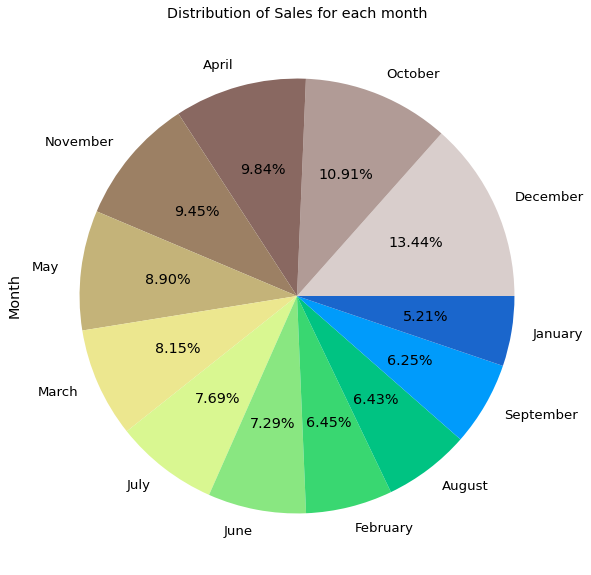

In [ ]:
plt.figure(figsize = (10,10))
col = sns.color_palette("terrain_r", 12)
sns.set_context('poster', font_scale = 0.6)
df['Month'].value_counts().plot(kind='pie',autopct='%1.2f%%', colors = col)
plt.title("Distribution of Sales for each month")
plt.show()

## **Total sales happened each day of the week**

Text(0.5, 1.0, 'Total Sales for each day of the week')

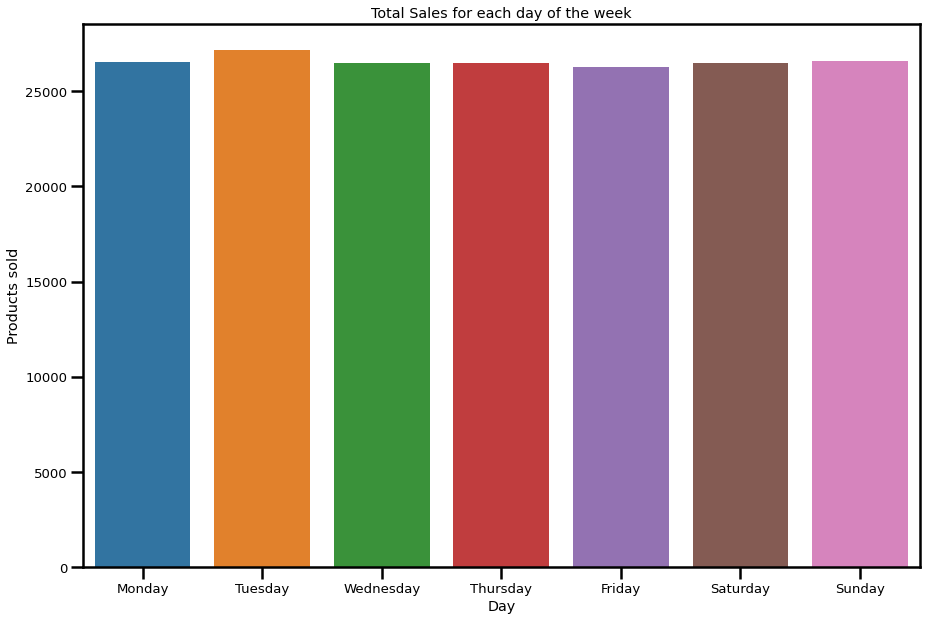

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x='Weekday', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Day')
plt.ylabel('Products sold')
plt.title('Total Sales for each day of the week')

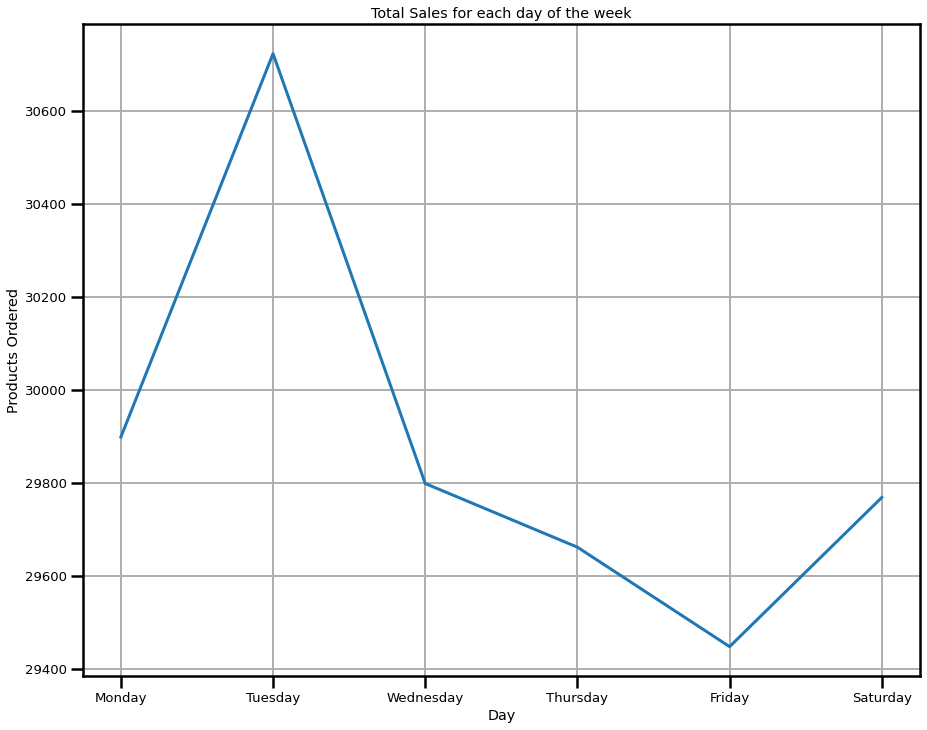

In [ ]:
plt.figure(figsize=(15, 12))
sales_days = df.groupby('Weekday').agg({"Quantity Ordered":"sum"}).reset_index()
sales_days = sales_days.sort_values('Weekday')
sales_days['day_names'] = pd.Categorical(sales_days['Weekday'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ordered=True)
sns.lineplot(x='day_names', y='Quantity Ordered', data=sales_days)
plt.title('Total Sales for each day of the week')
plt.xlabel('Day')
plt.ylabel('Products Ordered')
plt.grid()

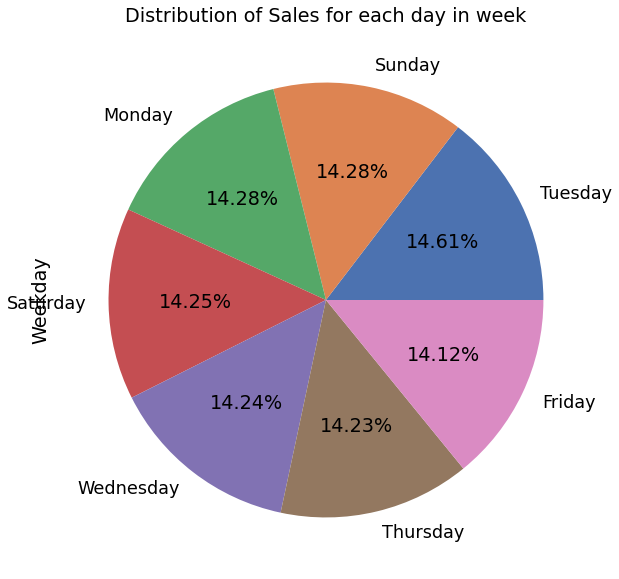

In [ ]:
plt.figure(figsize = (10,10))
col = sns.color_palette("deep", 12)
sns.set_context('poster', font_scale = 0.8)
df['Weekday'].value_counts().plot(kind='pie',autopct='%1.2f%%', colors = col)
plt.title("Distribution of Sales for each day in week")
plt.show()

## **Total sales for each category for every month**

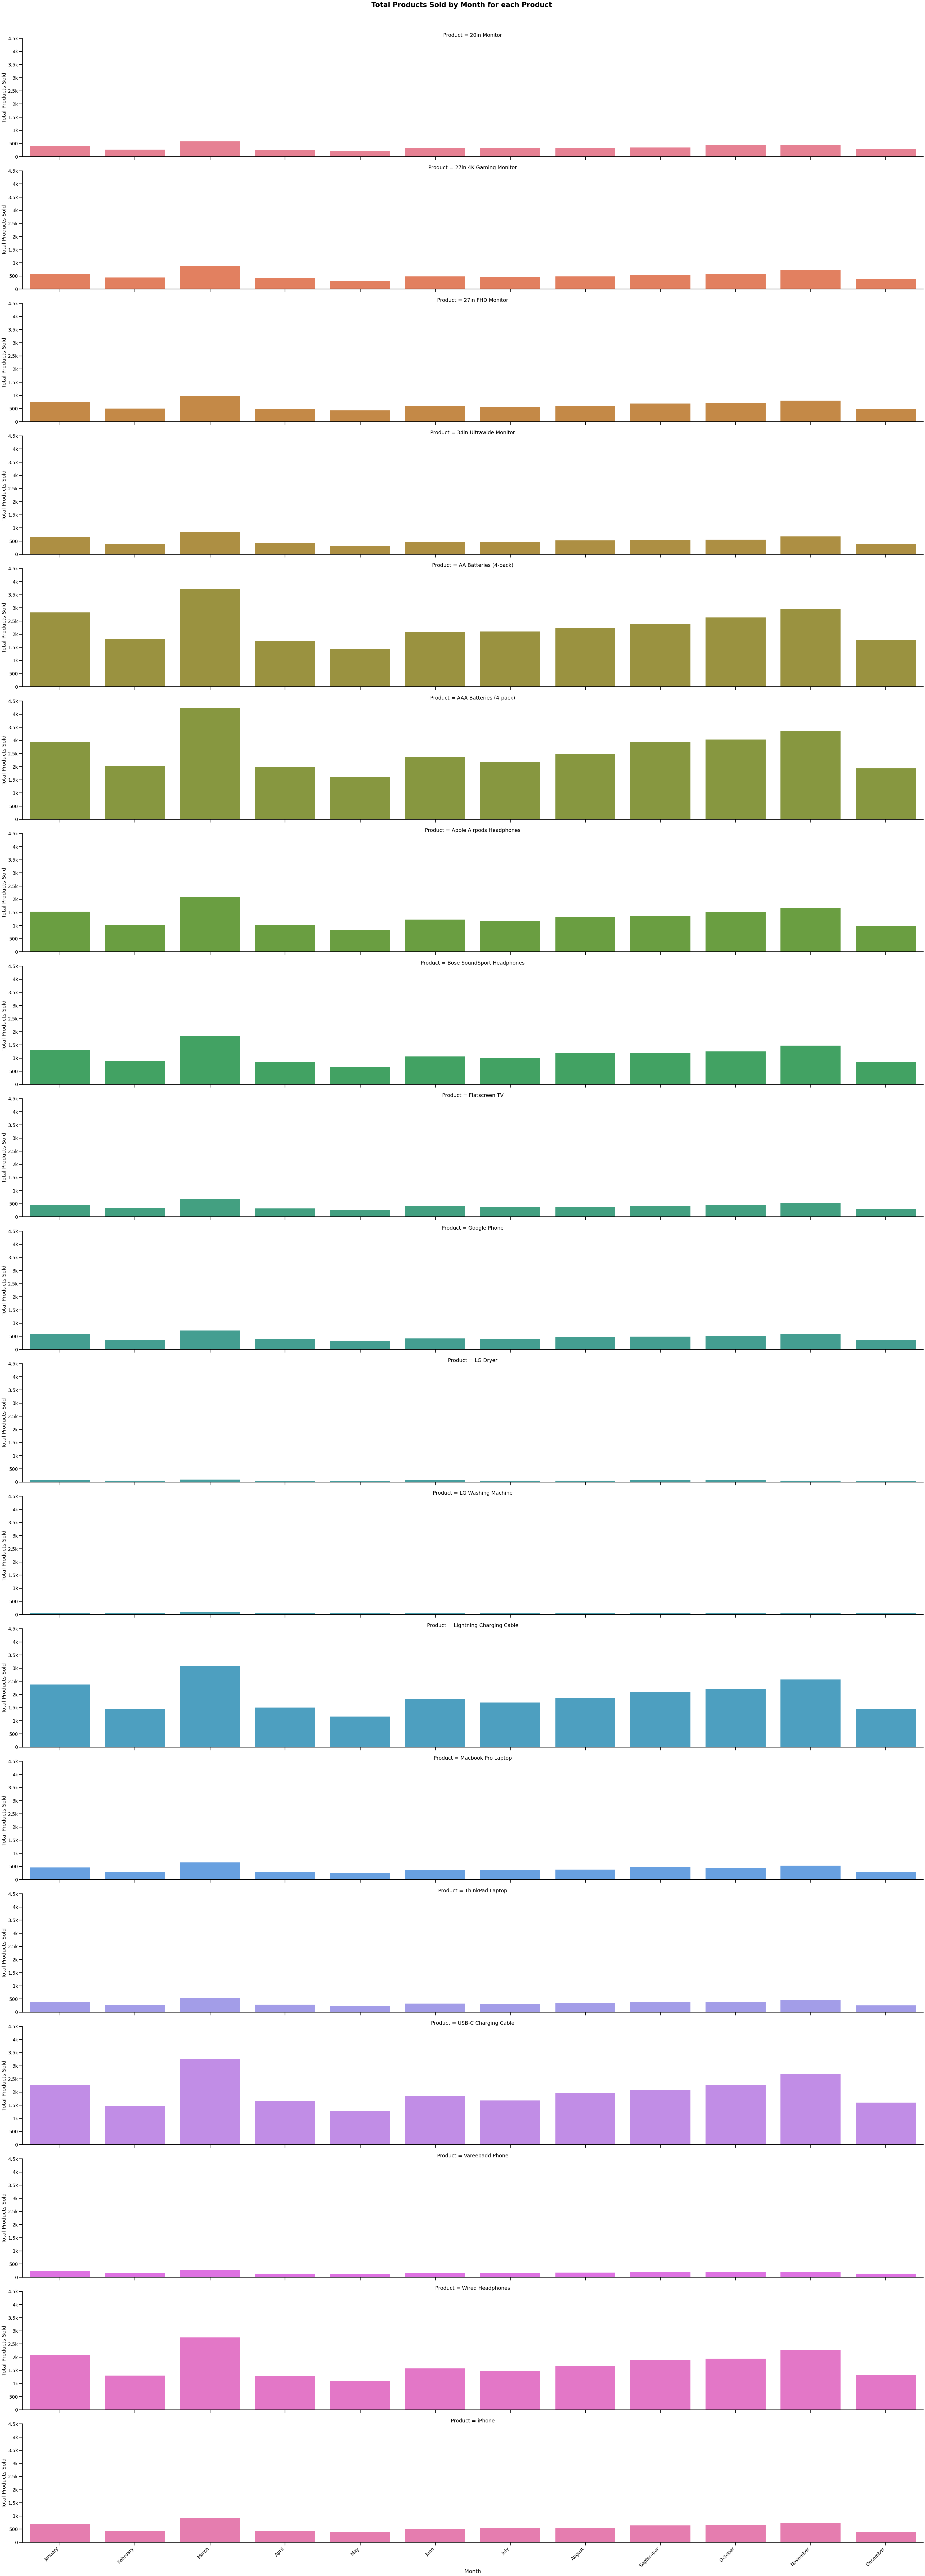

In [ ]:
sales_months = df.groupby(['Product', 'Month']).agg({'Quantity Ordered': 'sum'}).reset_index()
g = sns.FacetGrid(sales_months, col='Product', hue='Product', col_wrap =1, height=7, aspect=7, sharey=False)
g.map(sns.barplot, 'Month', 'Quantity Ordered')
g.set_axis_labels('Month', 'Total Products Sold', fontsize=20)
g.set(yticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500], yticklabels=['0', '500', '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k'])
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
g.set_xticklabels(labels=months_order, rotation=45, ha='right')
g.fig.suptitle('Total Products Sold by Month for each Product', y=1.01, weight='bold', fontsize=26)
plt.show()

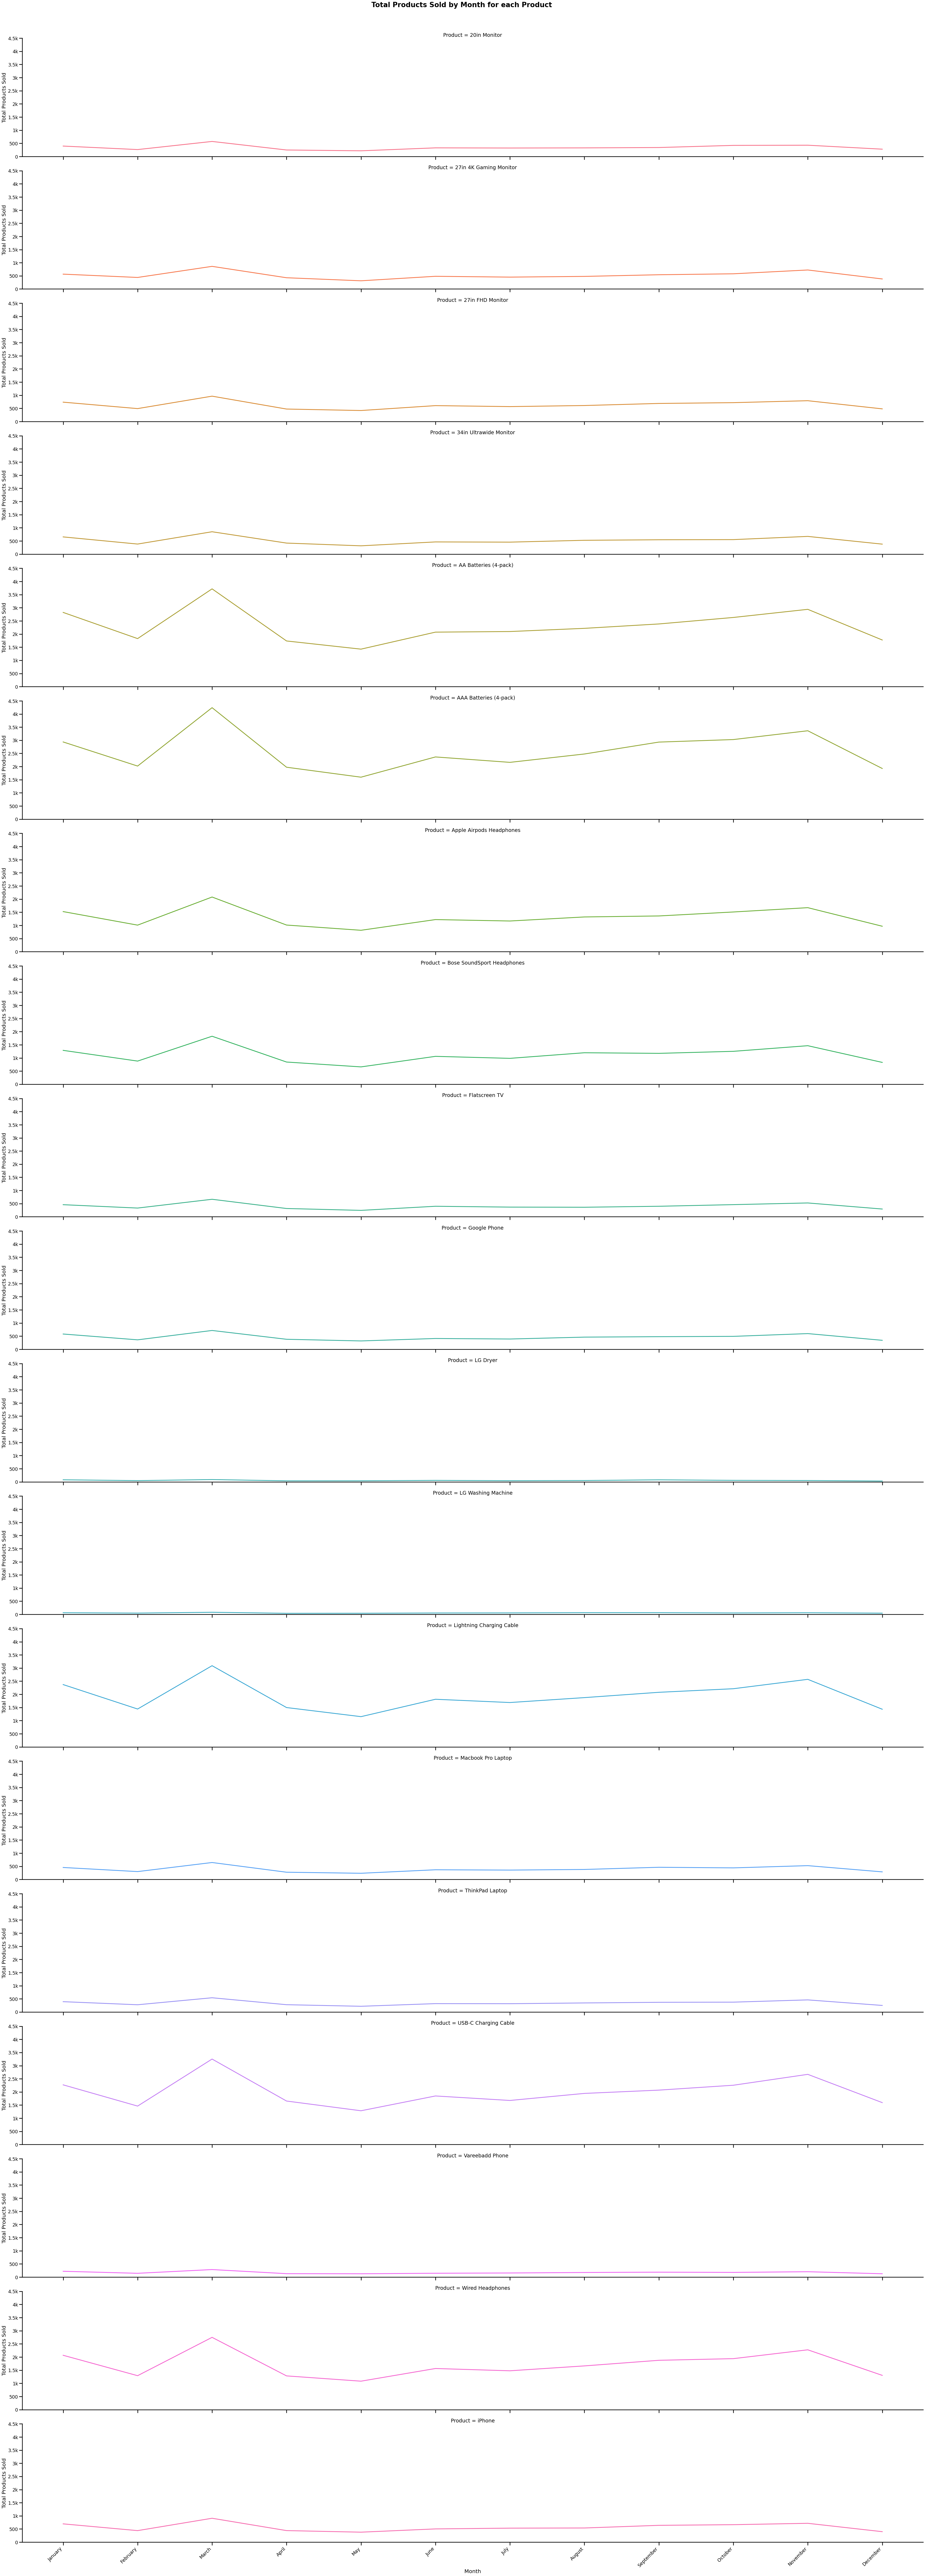

In [ ]:
sales_months = df.groupby(['Product', 'Month']).agg({'Quantity Ordered': 'sum'}).reset_index()
g = sns.FacetGrid(sales_months, col='Product', hue='Product', col_wrap =1, height=7, aspect=7, sharey=False)
g.map(sns.lineplot, 'Month', 'Quantity Ordered')
g.set_axis_labels('Month', 'Total Products Sold', fontsize=20)
g.set(yticks=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500], yticklabels=['0', '500', '1k', '1.5k', '2k', '2.5k', '3k', '3.5k', '4k', '4.5k'])
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
g.set_xticklabels(labels=months_order, rotation=45, ha='right')
g.fig.suptitle('Total Products Sold by Month for each Product', y=1.01, weight='bold', fontsize=26)
plt.show()